In [5]:
# 그래프, 수학 기능 추가
# Add graph and math features
import pylab as py
import numpy as np
import numpy.linalg as nl
# 기호 연산 기능 추가
# Add symbolic operation capability
import sympy as sy

In [6]:
# 3차원 그래픽
# 3D Graphics
from mpl_toolkits.mplot3d import Axes3D

# 3차원 공간의 직선과 평면<br>Lines and Planes of 3D Spaces

## 3차원 공간의 직선<br>Lines of 3D Spaces

3차원 공간의 직선을 벡터로 표시해 보자.<br>Let's describe a line on a 3D space using vectors.

$$
    \mathbf{x}=\mathbf{x_0}+t \cdot \mathbf{d}
$$

여기서 $\mathbf{x_0}$는 직선 위의 점, $\mathbf{d}$는 직선의 방향, $t$는 $-\infty$ 와 $\infty$ 사이에서 변화하는 매개변수이다. <br>Here, $\mathbf{x_0}$ is a point on the line, $\mathbf{d}$ is the direction of the line, and $t$ is a parameter that changes between $-\infty$ and $\infty$.  

예를 들어 $\mathbf{x}_0=(-1, 1, 1)^T$ 을 지나고 방향은 $\mathbf{d}=(1, 1, 1)^T$ 인 직선을 그려보자.<br>
For example, let's plot a line passing $\mathbf{x}_0=(-1, 1, 1)^T$ with direction of $\mathbf{d}=(1, 1, 1)^T$.

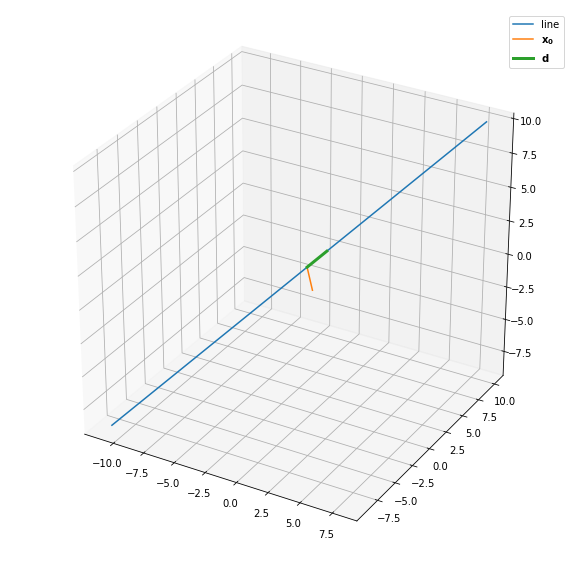

In [7]:
x_0 = np.matrix([[-1, 1, 1]]).T
d = np.matrix([[1, 1, 1]]).T
t = np.matrix([np.arange(-10, 10)])
x = (x_0 + d * t).tolist()

fig = py.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x[0], x[1], x[2], label='line')
ax.plot((0, x_0[0, 0]), (0, x_0[1, 0]), (0, x_0[2, 0]), label='$\\mathbf{x_0}$')
ax.plot((x_0[0, 0], x_0[0, 0]+d[0, 0]), 
        (x_0[1, 0], x_0[1, 0]+d[1, 0]), 
        (x_0[2, 0], x_0[2, 0]+d[2, 0]), 
        label='$\\mathbf{d}$', linewidth=3)

py.legend(loc=0)

## 3차원 공간의 평면<br>Planes of 3D Spaces

(Weisstein, Eric W. "Plane." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/Plane.html)

3차원 공간의 평면은 다음 조건을 만족하는 점 $\mathbf{x}$의 집합이다.<br>A 3D plane is a set of points $\mathbf{x}$ satisfying the following condition.

$$
    \mathbf{n} \cdot \left(\mathbf{x} - \mathbf{x}_0 \right) = 0
$$

여기서 $\mathbf{x}_0$은 평면 위의 한 점이고 $\mathbf{n}$은 평면에 수직인 벡터이다.<br>
Here, $\mathbf{x}_0$ is a point on the plane and $\mathbf{n}$ is a vector normal to the plane. 

위 내적 값을 시각화 해보자.<br>Let's visualize the inner product values.

Text(0.5,0.92,'$\\mathbf{n} \\cdot \\left(\\mathbf{x} - \\mathbf{x}_0 \\right)$')

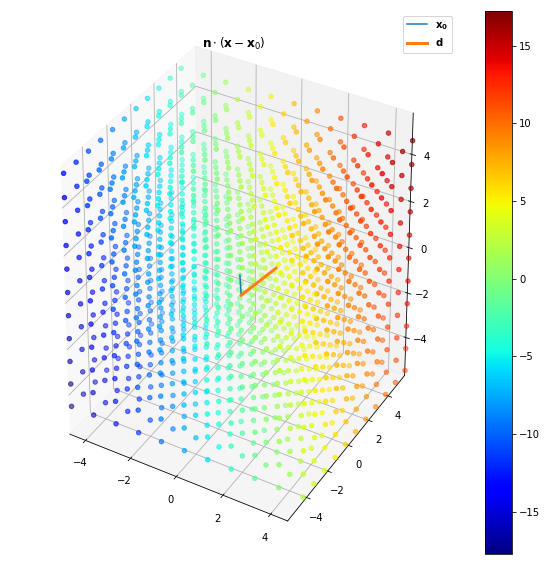

In [8]:
# Normal Direction
n = py.matrix([[2, 1, 0.5]]).T
# A point on the plane
x_0 = py.matrix([[1, -2, 0.5]]).T

# Set x y z ranges
x_array = py.linspace(-5, 5, 10+1)
y_array = py.linspace(-5, 5, 10+1)
z_array = py.linspace(-5, 5, 10+1)

# Combinations of x y z coordinates
x_mesh, y_mesh, z_mesh = py.meshgrid(x_array, y_array, z_array)

x_flat = x_mesh.flatten()
y_flat = y_mesh.flatten()
z_flat = z_mesh.flatten() 

# (x - x_0)
x_minus_x0_x_flat = x_flat - x_0[0, 0]
x_minus_x0_y_flat = y_flat - x_0[1, 0]
x_minus_x0_z_flat = z_flat - x_0[2, 0]

# Prepare for the dot product
x_minus_x0_array = py.array(
    [
        x_minus_x0_x_flat,
        x_minus_x0_y_flat,
        x_minus_x0_z_flat,
    ]
)

# n dot (x - x_0)
dot_product = py.array(py.dot(n.T, x_minus_x0_array)).flatten()

# Prepare for the 3D axis
fig = py.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
# https://matplotlib.org/gallery/mplot3d/scatter3d.html
# http://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut5.html
scatter = ax.scatter(x_flat, 
                     y_flat, 
                     z_flat, c=dot_product, cmap='jet')

# Indicate x_0
ax.plot((0, x_0[0, 0]), (0, x_0[1, 0]), (0, x_0[2, 0]), label='$\\mathbf{x_0}$')
# Indicate d
ax.plot((x_0[0, 0], x_0[0, 0]+d[0, 0]), 
        (x_0[1, 0], x_0[1, 0]+d[1, 0]), 
        (x_0[2, 0], x_0[2, 0]+d[2, 0]), 
        label='$\\mathbf{d}$', linewidth=3)

# Legend
py.legend(loc=0)

# Which color of point represent which value?
py.colorbar(scatter)

# Adjust x y z axis scale
py.axis('equal')

# Title of the plot
py.title(r'$\mathbf{n} \cdot \left(\mathbf{x} - \mathbf{x}_0 \right)$')


내적 값 0인 점의 집합이 해당 평면이다.<br>The set of points with the inner product value 0 is the plane.